**Bağımlı İki Örneklem T Testi**

Bağımlı iki grup ortlaması arasında karşılaştırma yapmak için kullanılır.

**Varsayımlar**                                                                                                         
-Normallik                                                                                                             
-Varyans Homojenliği

**İş Uygulaması: Şirket İçi Eğitimin Performans Etkisi Ölçümü**
    

Problem: Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.

Detaylar:                                                                                             
-Bir departman bir konuda eğitim talep ediyor.                                                         
-Gerekli/Gereksiz değerlendirmeleri neticesinde eğitim alınıyor.                                               
-Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.                                            
-Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.                                   


**Bağımlı İki Örneklem T Testi**

In [8]:
import pandas as pd
import numpy as np

oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [9]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [10]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [11]:
 np.arange(len(oncesi))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [12]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



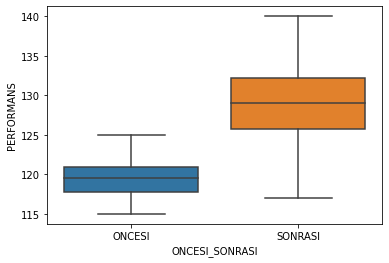

In [14]:
import seaborn as sns
sns.boxplot(x="ONCESI_SONRASI", y="PERFORMANS", data=BIRLIKTE);

**Varsayım Kontrolleri**

In [15]:
from scipy.stats import shapiro

In [19]:
shapiro(AYRIK.ONCESI) #pValue değeri 0,05 den küçük değil bu yüzden red edemiyoruz.

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

In [20]:
shapiro(AYRIK.SONRASI) #pValue değeri yine 0,05 den büyük bu yüzden yine red edemiyoruz.

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

In [21]:
# Yukarıdan çıkaracağımız anlam: normal dağılım ile örnek değılım arasında fark yoktur.

In [24]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

#Burada varyans homejenliği sağlanmamaktadır.

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [25]:
# burada ilk varsayım sağlanıp ikinci varsayım sağlanmıyor demek oluyor.

**Hipotez Testi**

In [27]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [28]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.28153, p-değeri = 0.00000


In [30]:
# pValue değeri 0,05 değerinden küçük olduğu için H0 hipotezi red edilmiştir. Eğitim işe yaramıştır.
# Attığımız taş ürküttüğümüz kurbağa değmiştir.